In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-flower-dataset/IRIS.csv


In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()
df = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Exploratory Data Analysis:

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**As we can see here there are no outliers but we will visualize the feature variables**

In [34]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Here, we can observe there are no missing values**

In [35]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Now checking whether the target variable is having imbalanced data

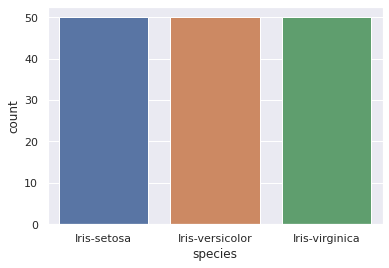

In [36]:
sns.countplot(df['species'])

**We can observe that the data has balanced data in target variable**

### Univariate Analysis:

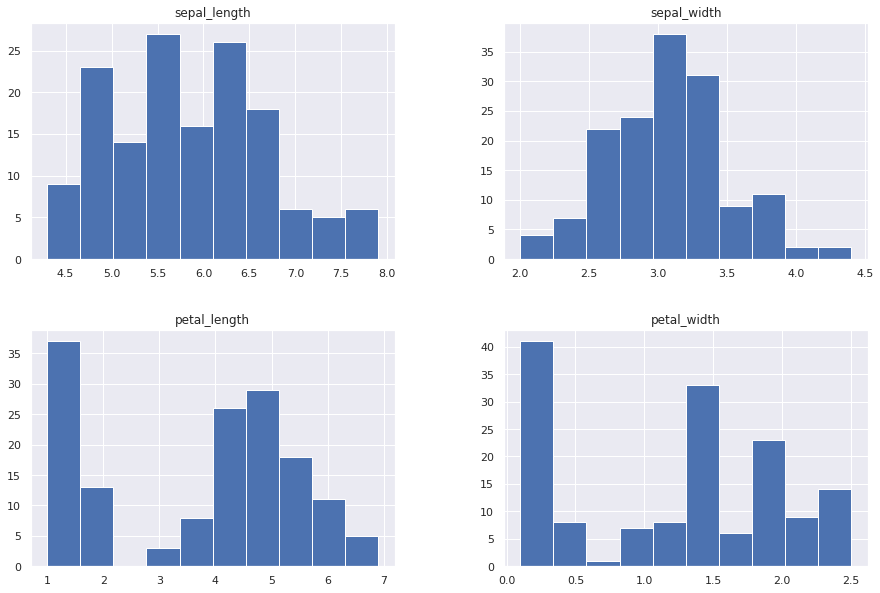

In [37]:
df.hist(figsize=(15,10))
plt.show()

### Bi-variate Analysis:

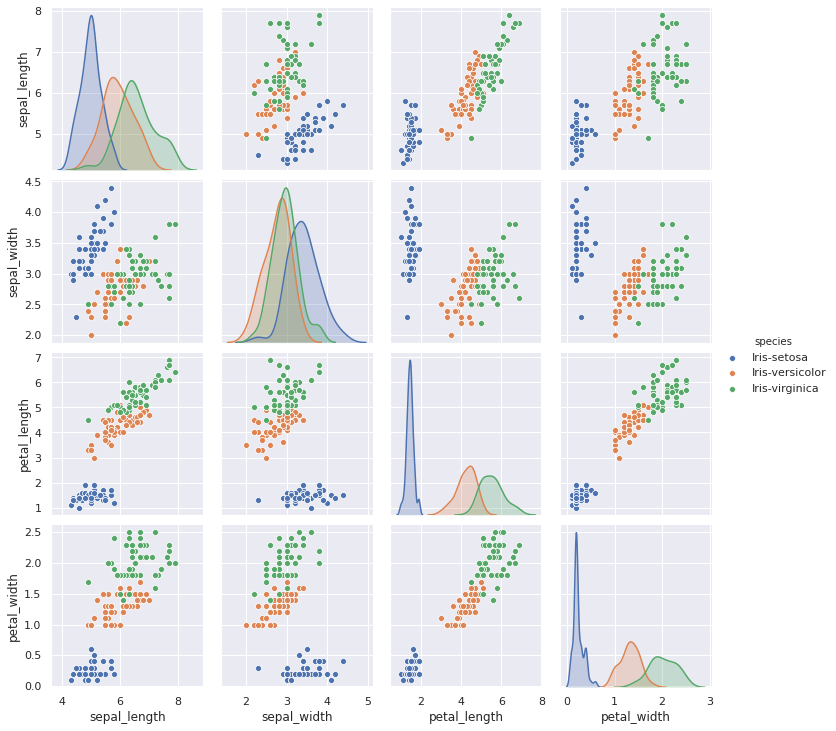

In [38]:
sns.pairplot(df, hue = 'species')

**Now let's see how the independent effects the target variable**

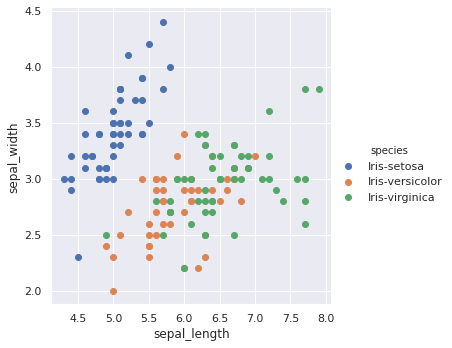

In [39]:
sns.FacetGrid(df, hue='species', height = 5).map(plt.scatter, 'sepal_length', 'sepal_width').add_legend()

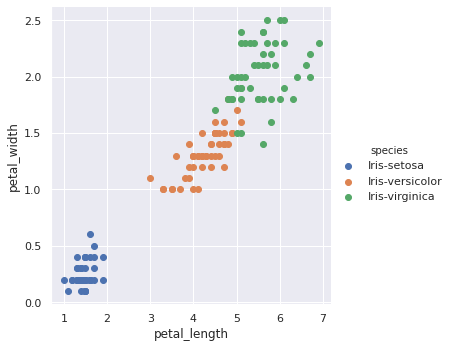

In [40]:
sns.FacetGrid(df, hue='species', height = 5).map(plt.scatter, 'petal_length', 'petal_width').add_legend()

**This two features can also be used to create a model but the target variable classes data is imbalanced here**

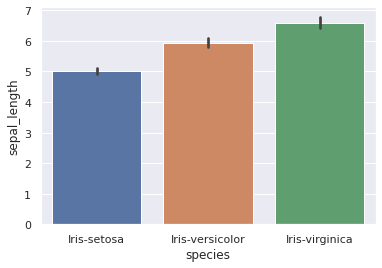

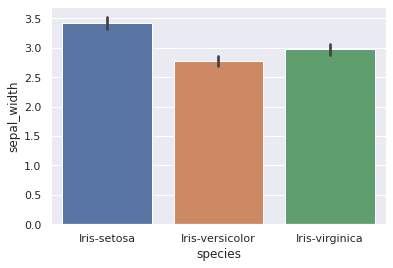

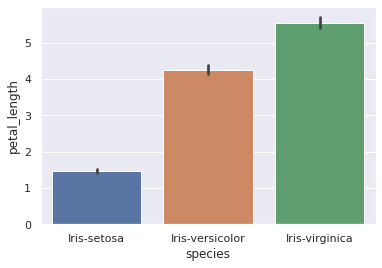

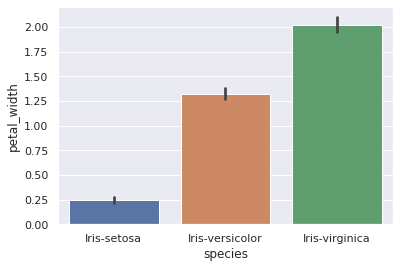

In [41]:
for col in df.iloc[:,:-1].columns:
    sns.barplot(df['species'], df[col])
    plt.show()

### Data Preparation:
         1) Encoding the target variable
         2) splitting the data into training and testing data

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
mapping = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species'] = df['species'].map(mapping)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
X = df.iloc[:,:-1]
Y = df['species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

## Multi-class Classification

### Modelling

In [46]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

sgdc = Pipeline([('scaler', StandardScaler()),
                ('sgd', SGDClassifier())])

sgdc.fit(x_train, y_train)
ypred = sgdc.predict(x_test)
print('accuracy score:', accuracy_score(y_test, ypred))

accuracy score: 0.9333333333333333


In [49]:
dr = DecisionTreeClassifier()
dr.fit(x_train, y_train)
ypred1 = dr.predict(x_test)
print('accuracy score:', accuracy_score(y_test, ypred1))

accuracy score: 0.9666666666666667


In [50]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
ypred2 = rf.predict(x_test)
print('accuracy score:', accuracy_score(y_test, ypred2))

accuracy score: 0.9333333333333333


In [51]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
ypred3 = xgb.predict(x_test)
print('accuracy score:', accuracy_score(y_test, ypred3))

accuracy score: 0.9333333333333333
